# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1
sets = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} of Set {sets} | {city_record}")
         
        record= record + 1
        if record == 51:
            record = 0
            sets = sets+1
            
        time.sleep(1.01)
        
    except:
        print("City not found. Skipping...")
    continue
    
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Hermanus
Processing Record 2 of Set 1 | Mar del Plata
Processing Record 3 of Set 1 | Ushuaia
City not found. Skipping...
Processing Record 4 of Set 1 | Ponta do Sol
Processing Record 5 of Set 1 | Yulara
Processing Record 6 of Set 1 | Esperance
Processing Record 7 of Set 1 | Mataura
City not found. Skipping...
Processing Record 8 of Set 1 | Saint-Pierre
Processing Record 9 of Set 1 | Alofi
Processing Record 10 of Set 1 | New Norfolk
City not found. Skipping...
Processing Record 11 of Set 1 | São Gabriel da Cachoeira
Processing Record 12 of Set 1 | Hong Kong
Processing Record 13 of Set 1 | Pangnirtung
Processing Record 14 of Set 1 | Hithadhoo
City not found. Skipping...
Processing Record 15 of Set 1 | Dali
Processing Record 16 of Set 1 | Kruisfontein
Processing Record 17 of Set 1 | Rome
Processing Record 18 of Set 1 | Saldanha
Processing Record 19 of Set 1 | Pauini
Processing Record 20 of Set 1 | Bamb

Processing Record 31 of Set 4 | Karratha
Processing Record 32 of Set 4 | Vaasa
Processing Record 33 of Set 4 | Santa Rosa
Processing Record 34 of Set 4 | Tasiilaq
Processing Record 35 of Set 4 | Namatanai
Processing Record 36 of Set 4 | Laas
Processing Record 37 of Set 4 | Lagoa
Processing Record 38 of Set 4 | Hargeisa
Processing Record 39 of Set 4 | Popondetta
Processing Record 40 of Set 4 | Novokorsunskaya
Processing Record 41 of Set 4 | Atasū
Processing Record 42 of Set 4 | Iquitos
Processing Record 43 of Set 4 | Sassandra
Processing Record 44 of Set 4 | Kaeo
Processing Record 45 of Set 4 | Berdigestyakh
Processing Record 46 of Set 4 | Bariloche
Processing Record 47 of Set 4 | Palencia
Processing Record 48 of Set 4 | Sabha
Processing Record 49 of Set 4 | Abhar
Processing Record 50 of Set 4 | Thyborøn
Processing Record 0 of Set 5 | Mount Gambier
Processing Record 1 of Set 5 | Lexington
Processing Record 2 of Set 5 | Olafsvik
Processing Record 3 of Set 5 | Kaitangata
Processing Record

Processing Record 15 of Set 8 | Grand Gaube
Processing Record 16 of Set 8 | Libreville
Processing Record 17 of Set 8 | Baruun-Urt
Processing Record 18 of Set 8 | Clyde River
Processing Record 19 of Set 8 | Ruteng
Processing Record 20 of Set 8 | Zabul Province
Processing Record 21 of Set 8 | Palmer
Processing Record 22 of Set 8 | Coolum Beach
Processing Record 23 of Set 8 | Batagay
Processing Record 24 of Set 8 | Mutoko
Processing Record 25 of Set 8 | Vangaindrano
Processing Record 26 of Set 8 | Taoudenni
Processing Record 27 of Set 8 | São Filipe
Processing Record 28 of Set 8 | Leticia
Processing Record 29 of Set 8 | Zheleznodorozhnyy
City not found. Skipping...
Processing Record 30 of Set 8 | Charter Township of Clinton
Processing Record 31 of Set 8 | Boa Vista
Processing Record 32 of Set 8 | Adrar
Processing Record 33 of Set 8 | Mallāpuram
Processing Record 34 of Set 8 | Alice Springs
Processing Record 35 of Set 8 | Naze
City not found. Skipping...
Processing Record 36 of Set 8 | Lüd

City not found. Skipping...
Processing Record 42 of Set 11 | Kolosovka
Processing Record 43 of Set 11 | Tamiahua


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": city,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weather_data = pd.DataFrame(weather_dict) 
weather_data.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [8]:
weather_data.to_csv('../output_data/weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tamiahua,3,ZA,1584478230,90,-34.42,19.23,66.0,1.99
1,tamiahua,100,AR,1584478231,77,-38.00,-57.56,70.0,6.93
2,tamiahua,75,AR,1584478232,50,-54.80,-68.30,55.4,3.36
3,tamiahua,40,PT,1584477996,63,32.67,-17.10,60.8,17.22
4,tamiahua,0,AU,1584477975,31,-25.24,130.99,77.0,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

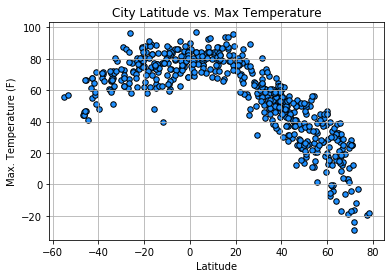

In [18]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=30, facecolors="dodgerblue", edgecolors="black")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (F)")
plt.grid(True)

plt.savefig("../output_data/Fig1.png")

plt.show()

#### Latitude vs. Humidity Plot

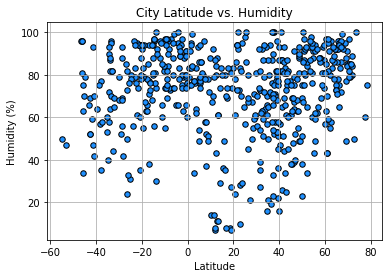

In [20]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=30, facecolors="dodgerblue", edgecolors="black")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../output_data/Fig2.png")

plt.show()

#### Latitude vs. Cloudiness Plot

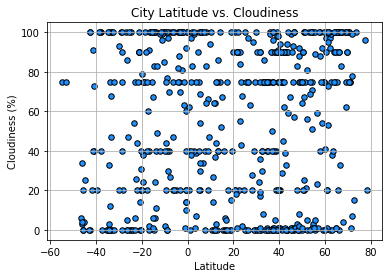

In [21]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=30, facecolors="dodgerblue", edgecolors="black")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("../output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

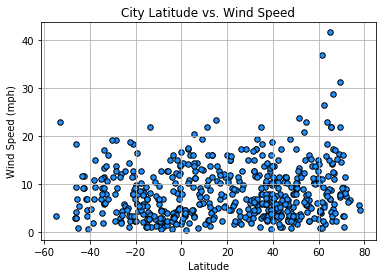

In [22]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=30, facecolors="dodgerblue", edgecolors="black")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("../output_data/Fig4.png")

plt.show()

## Linear Regression

In [4]:
# OPTIONAL: Create a function to create Linear Regression plots


In [5]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression